In [3]:
import numpy as np
from math import sqrt

import time
from timeit import default_timer as timer
from multiprocessing import Pool, cpu_count

In [4]:
data1 = np.array(np.random.rand(2000, 2000))
data2 = np.array(np.random.rand(2000, 2000))

Two dimensional euclidian distance  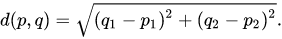

In [5]:
def euclid_distance_math(x, y):
    return sqrt(sum((i - j) ** 2 for d1, d2 in zip(x, y) for i, j in zip(d1, d2)))

In [6]:
# %%timeit
euclid_distance_math(data1, data2)

# 816.7664409901531
# 2.5 s ± 35.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

2.34 s ± 68 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [7]:
# Splitting numpy arrays into two subsets of same size
data1_1, data1_2 = data1[:1000, ...], data1[1000:, ...]
data2_1, data2_2 = data1[:1000, ...], data1[1000:, ...]

In [87]:
def euclid_distance_vectorized(x, y):
    return sqrt(sum((x.flatten() - y.flatten()) ** 2))

816.5149519336449


[0.64931597 0.75000671 0.26071188 ... 0.88007998 0.32174859 0.76562313] 
 [0.28914066 0.55932113 0.43335278 ... 0.63493813 0.81153357 0.30956005]
0.6493159651714185 0.28914065659069754


816.5149519336449

In [49]:
!python3 setup.py build_ext --inplace 

Compiling euclid.pyx because it changed.
[1/1] Cythonizing euclid.pyx
running build_ext
building 'euclid' extension
clang -Wno-unused-result -Wsign-compare -Wunreachable-code -fno-common -dynamic -DNDEBUG -g -fwrapv -O3 -Wall -I/Library/Developer/CommandLineTools/SDKs/MacOSX11.0.sdk/usr/include -I/Library/Developer/CommandLineTools/SDKs/MacOSX11.0.sdk/System/Library/Frameworks/Tk.framework/Versions/8.5/Headers -I/usr/local/include -I/usr/local/opt/openssl@1.1/include -I/usr/local/opt/sqlite/include -I/usr/local/Cellar/python@3.9/3.9.0_2/Frameworks/Python.framework/Versions/3.9/include/python3.9 -c euclid.c -o build/temp.macosx-11.0-x86_64-3.9/euclid.o
clang -bundle -undefined dynamic_lookup build/temp.macosx-11.0-x86_64-3.9/euclid.o -L/usr/local/lib -L/usr/local/opt/openssl@1.1/lib -L/usr/local/opt/sqlite/lib -o /Users/i520251/Nextcloud/Programming for Data Science/10 Performance Optimization/euclid.cpython-39-darwin.so


In [92]:
!python3 performance_optimization_richard_tief.py

starting computation with numpy
816.4517594400052
elapsed time: 0.012906678000000005s
-------------------------------------------------------------
starting computation item per item
816.4517594399805
elapsed time: 2.853860611s
-------------------------------------------------------------
starting computation with parallelization on 2 cores
816.4517594399805
elapsed time: 3.295689055s
-------------------------------------------------------------
starting computation in C
816.4517594399805
elapsed time: 0.8653160710000005s
-------------------------------------------------------------
starting computation vectorized
816.4517594399805
elapsed time: 0.6581074729999994s
